In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *

In [2]:
control_df = pd.read_csv('control_group.csv',sep=';')
test_df = pd.read_csv('test_group.csv',sep=';')

In [3]:
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
control_df.columns = ['Campaign Name','Date','Amount Spend in $','Impressions','Reach','No of Webisite Clicks',
                      'No of Searches','Content viewed','Add to cart','Purchases']
test_df.columns = ['Campaign Name','Date','Amount Spend in $','Impressions','Reach','No of Webisite Clicks',
                      'No of Searches','Content viewed','Add to cart','Purchases']

In [7]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          30 non-null     object 
 1   Date                   30 non-null     object 
 2   Amount Spend in $      30 non-null     int64  
 3   Impressions            29 non-null     float64
 4   Reach                  29 non-null     float64
 5   No of Webisite Clicks  29 non-null     float64
 6   No of Searches         29 non-null     float64
 7   Content viewed         29 non-null     float64
 8   Add to cart            29 non-null     float64
 9   Purchases              29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [8]:
control_df.isnull().sum(axis=0)

Campaign Name            0
Date                     0
Amount Spend in $        0
Impressions              1
Reach                    1
No of Webisite Clicks    1
No of Searches           1
Content viewed           1
Add to cart              1
Purchases                1
dtype: int64

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign Name          30 non-null     object
 1   Date                   30 non-null     object
 2   Amount Spend in $      30 non-null     int64 
 3   Impressions            30 non-null     int64 
 4   Reach                  30 non-null     int64 
 5   No of Webisite Clicks  30 non-null     int64 
 6   No of Searches         30 non-null     int64 
 7   Content viewed         30 non-null     int64 
 8   Add to cart            30 non-null     int64 
 9   Purchases              30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [10]:
test_df.isnull().sum(axis=0)

Campaign Name            0
Date                     0
Amount Spend in $        0
Impressions              0
Reach                    0
No of Webisite Clicks    0
No of Searches           0
Content viewed           0
Add to cart              0
Purchases                0
dtype: int64

In [11]:
#Filling the missing values in Control_df
control_df['Impressions'].fillna(control_df['Impressions'].mean(),inplace=True)
control_df['Reach'].fillna(control_df['Reach'].mean(),inplace=True)
control_df['No of Webisite Clicks'].fillna(control_df['No of Webisite Clicks'].mean(),inplace=True)
control_df['No of Searches'].fillna(control_df['No of Searches'].mean(),inplace=True)
control_df['Content viewed'].fillna(control_df['Content viewed'].mean(),inplace=True)
control_df['Add to cart'].fillna(control_df['Add to cart'].mean(),inplace=True)
control_df['Purchases'].fillna(control_df['Purchases'].mean(),inplace=True)

In [12]:
control_df.isnull().sum(axis=0)

Campaign Name            0
Date                     0
Amount Spend in $        0
Impressions              0
Reach                    0
No of Webisite Clicks    0
No of Searches           0
Content viewed           0
Add to cart              0
Purchases                0
dtype: int64

In [20]:
control_df.describe(include = [int,float])

,Amount Spend in $,Impressions,Reach,No of Webisite Clicks,No of Searches,Content viewed,Add to cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [21]:
test_df.describe(include = [int,float])

,Amount Spend in $,Impressions,Reach,No of Webisite Clicks,No of Searches,Content viewed,Add to cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [24]:
control_df_heat = control_df.drop(columns=['Campaign Name','Date'])
test_df_heat = test_df.drop(columns=['Campaign Name','Date'])

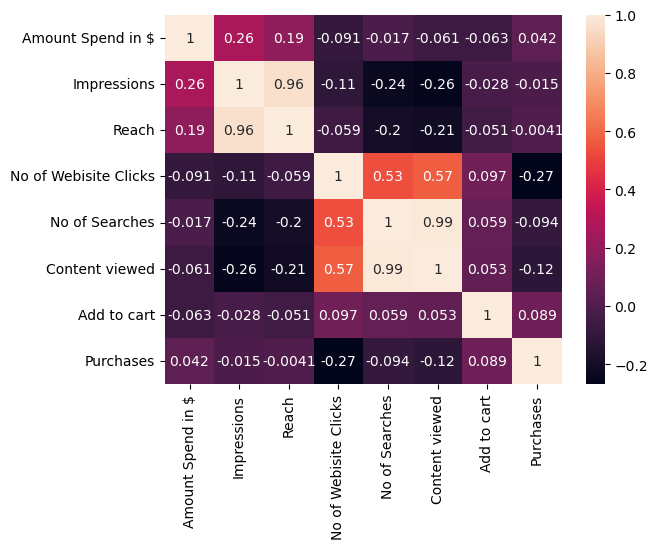

In [25]:
sns.heatmap(control_df_heat.corr(),annot=True)
plt.show()

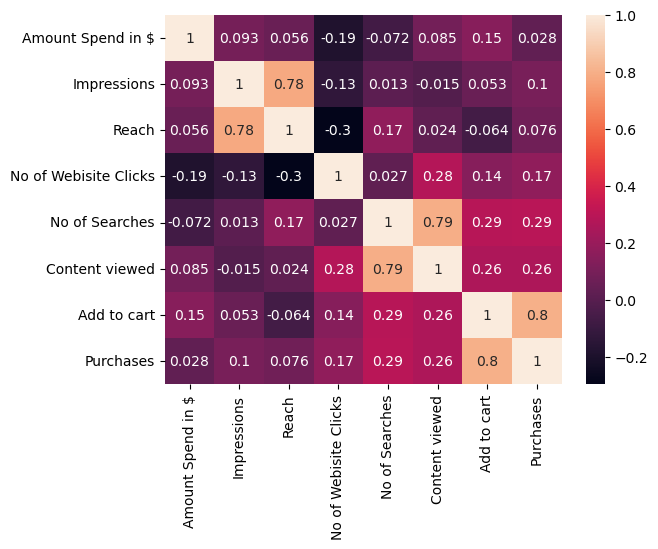

In [27]:
sns.heatmap(test_df_heat.corr(),annot=True)
plt.show()

In [29]:
ab_test_df = pd.concat([control_df,test_df]).sort_values('Date').reset_index()
ab_test_df.drop('index', inplace = True,axis = 1)

In [30]:
ab_test_df.head()

,Campaign Name,Date,Amount Spend in $,Impressions,Reach,No of Webisite Clicks,No of Searches,Content viewed,Add to cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

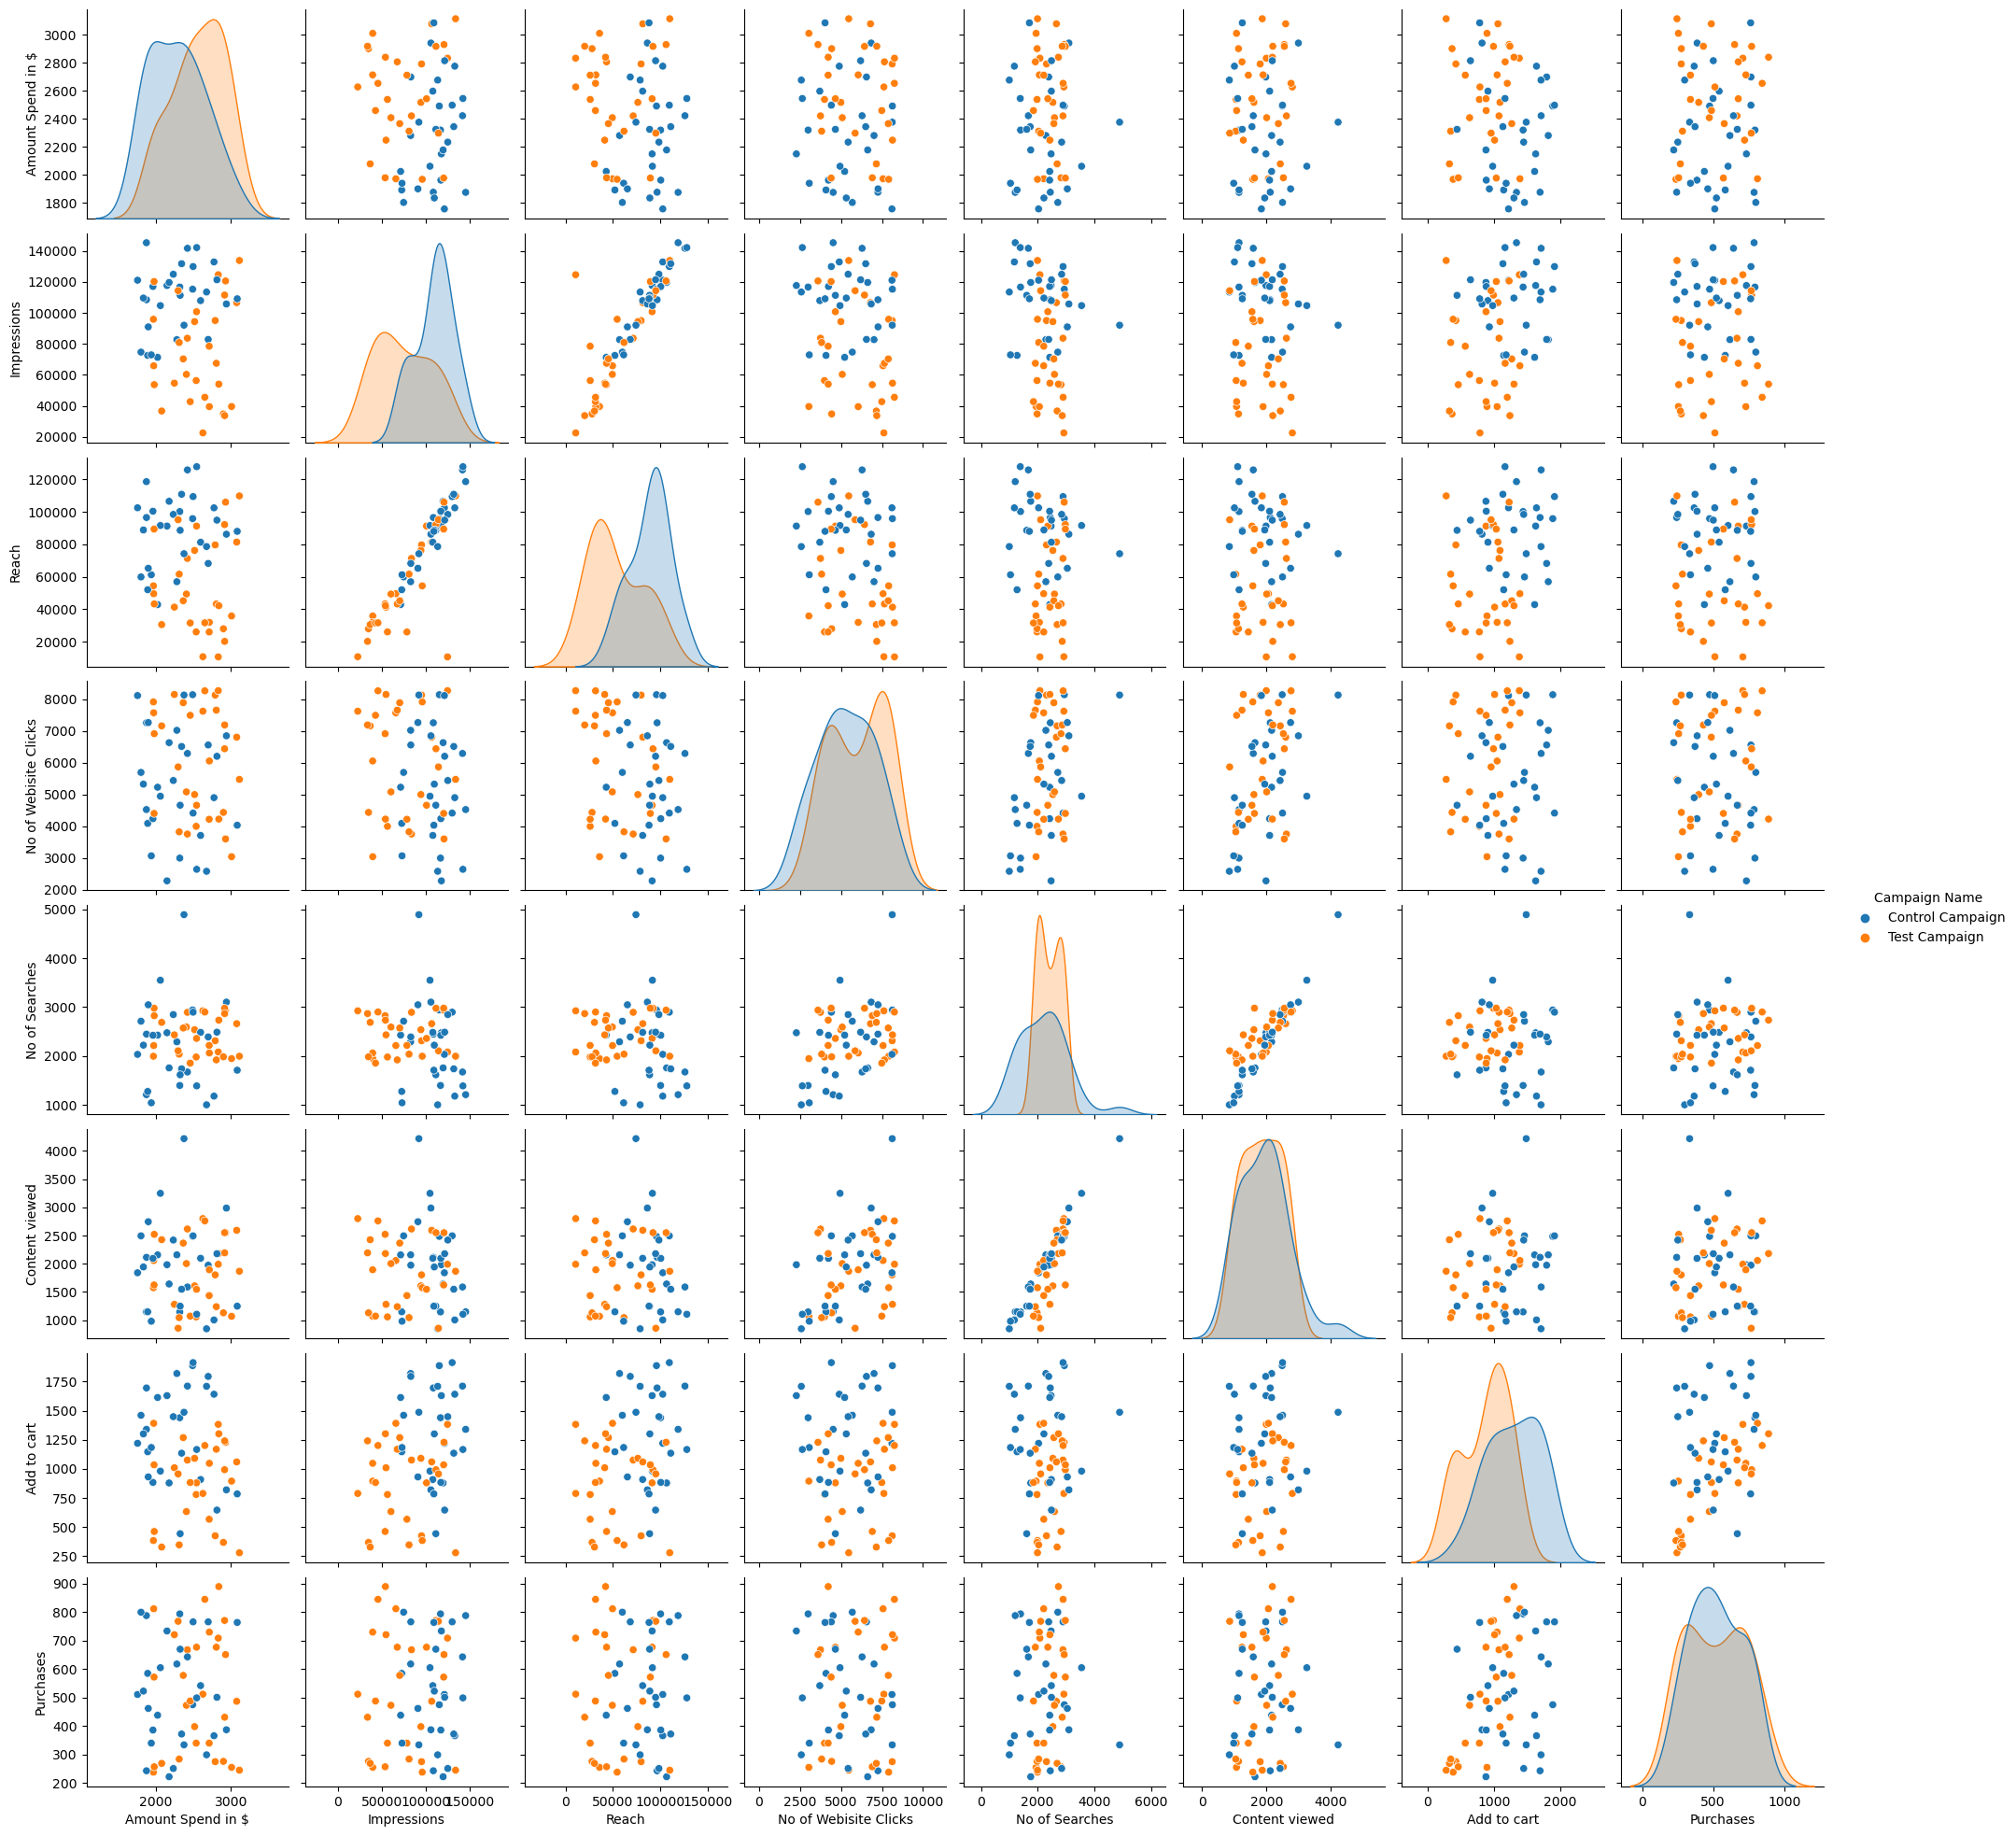

In [31]:
sns.pairplot(ab_test_df, hue = 'Campaign Name')

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


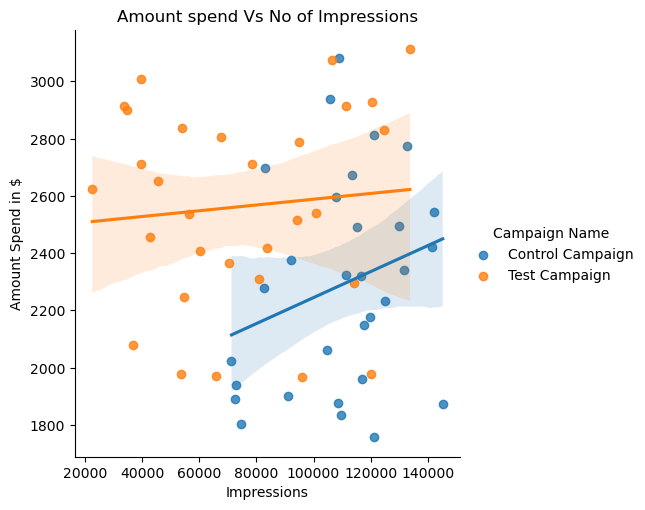

In [32]:
sns.lmplot(data = ab_test_df, x = 'Impressions', y = 'Amount Spend in $', hue = 'Campaign Name')
plt.title('Amount spend Vs No of Impressions')
plt.show()

In [33]:
reach=ab_test_df[['Campaign Name','Reach']].groupby('Campaign Name').sum('Reach').reset_index()
reach

,Campaign Name,Reach
0,Control Campaign,2.665348e+06
1,Test Campaign,1.604747e+06


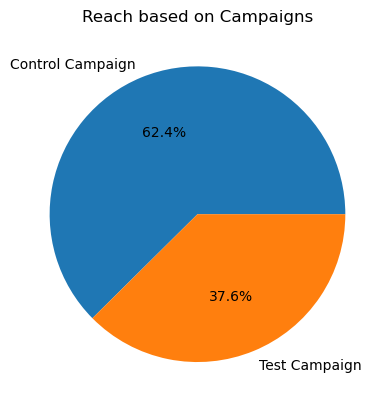

In [34]:
plt.pie(x=reach['Reach'].tolist(),labels=reach['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Reach based on Campaigns')
plt.show()

In [38]:
clicks=ab_test_df[['Campaign Name','No of Webisite Clicks']].groupby('Campaign Name').sum('No of Webisite Clicks').reset_index()
clicks

,Campaign Name,No of Webisite Clicks
0,Control Campaign,159623.793103
1,Test Campaign,180970.000000


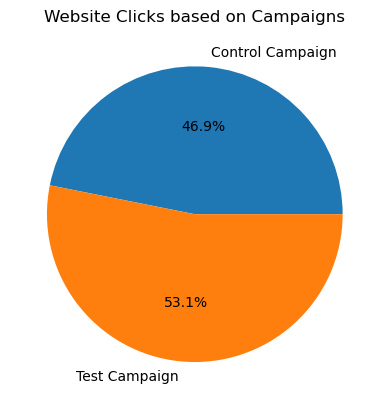

In [39]:
plt.pie(x=clicks['No of Webisite Clicks'].tolist(),labels=clicks['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Website Clicks based on Campaigns')
plt.show()

In [40]:
search=ab_test_df[['Campaign Name','No of Searches']].groupby('Campaign Name').sum('No of Searches').reset_index()
search

,Campaign Name,No of Searches
0,Control Campaign,66639.310345
1,Test Campaign,72569.000000


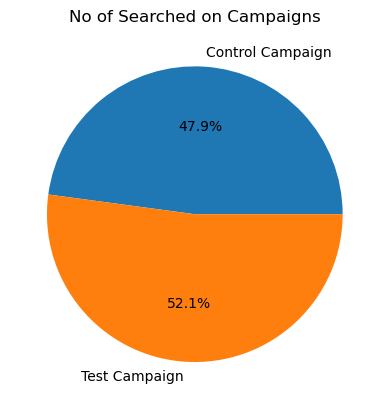

In [47]:
plt.pie(x=search['No of Searches'].tolist(),labels=search['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('No of Searched on Campaigns')
plt.show()

In [42]:
content=ab_test_df[['Campaign Name','Content viewed']].groupby('Campaign Name').sum('Content viewed').reset_index()
content

,Campaign Name,Content viewed
0,Control Campaign,58313.793103
1,Test Campaign,55740.000000


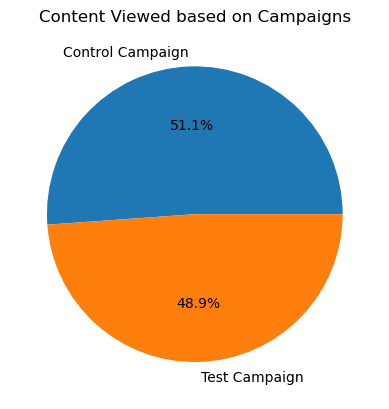

In [48]:
plt.pie(x=content['Content viewed'].tolist(),labels=content['Campaign Name'].tolist(),autopct='%1.1f%%')
plt.title('Content Viewed based on Campaigns')
plt.show()

In [44]:
cart=ab_test_df[['Campaign Name','Add to cart']].groupby('Campaign Name').sum('Add to cart').reset_index()
cart

,Campaign Name,Add to cart
0,Control Campaign,39000.0
1,Test Campaign,26446.0


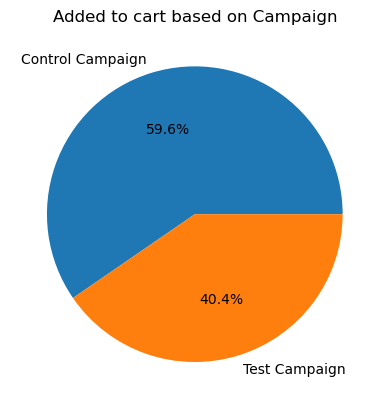

In [49]:
plt.pie(x = cart['Add to cart'].tolist(),labels = cart['Campaign Name'].tolist(),autopct = "%1.1f%%")
plt.title('Added to cart based on Campaign')
plt.show()

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


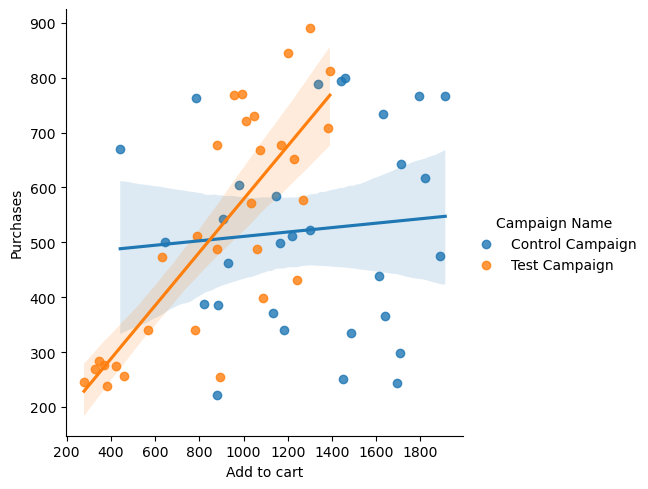

In [50]:
sns.lmplot(data=ab_test_df,x='Add to cart',y='Purchases',hue='Campaign Name')